In [1]:
!pip install gymnasium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 958.1/958.1 kB 15.0 MB/s eta 0:00:00


In [2]:
# استيراد المكتبة
import gymnasium as gym

# تهيئة البيئة
env = gym.make("CartPole-v1", render_mode="rgb_array")

# إعادة تهيئة البيئة للحصول على الحالة الأولية
observation, info = env.reset()

print(observation)

[ 0.04859291  0.04188552 -0.04963235 -0.04972314]


array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
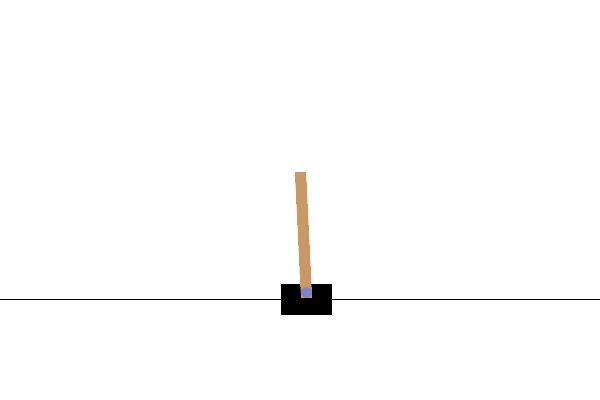

In [3]:
# إظهار الحالة الابتدائية
env.render()


In [4]:
# شكل الحالات
print("Observation space shape:", env.observation_space.shape)

Observation space shape: (4,)


In [5]:
# عدد الأفعال المتاحة
num_actions = env.action_space.n
print("Number of actions:", num_actions)

Number of actions: 2


In [6]:
terminated = False
truncated = False
# مجموع مكافأت الحلقة
total_reward=0
# الحلقة
while not (terminated or truncated):
    # اختيار فعل عشوائي
    action = env.action_space.sample()

    # تطبيق الفعل
    next_state, reward, terminated, truncated, info = env.step(action)

    # جمع المكافآت خلال الحلقة
    total_reward += reward
    # الانتقال إلى الحالة التالية
    state = next_state

print(f"Total Reward: {total_reward}")


Total Reward: 23.0


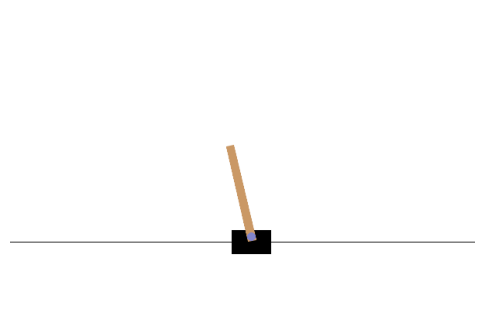

Total Reward: 12.0


In [7]:
# مكتبة الرسم
import matplotlib.pyplot as plt
# مكتبة الإظهار
from IPython.display import display, clear_output

# إنشاء الشكل لعرض البيئة
fig, ax = plt.subplots(figsize=(6, 6))

# تهيئة البيئة
observation, info = env.reset()

total_reward=0
terminated = False
truncated = False
# الحلقة
while not (terminated or truncated):
    # اختيار فعل عشوائي
    action = env.action_space.sample()
    # تطبيق الفعل
    next_state, reward, terminated, truncated, info = env.step(action)
    # جمع المكافآت خلال الحلقة
    total_reward += reward
    # الحصول على الإطار (الصورة) من البيئة
    frame = env.render()

    # تحديث الرسم البياني بالإطار الجديد
    ax.clear()  # مسح الإطار السابق
    ax.imshow(frame)  # عرض الإطار الحالي
    ax.axis('off')  # إخفاء المحاور لتوفير عرض أفضل

    # مسح الإطار السابق وعرض الشكل الجديد
    clear_output(wait=True)  # مسح الإطار السابق من العرض
    display(fig)  # عرض الشكل الجديد
    plt.pause(1)  # الانتظار لفترة قصيرة لإنشاء تأثير الحركة

    state = next_state  # الانتقال إلى الحالة التالية

print(f"Total Reward: {total_reward}")

In [8]:
# إغلاق البيئة بعد الانتهاء
env.close()
